In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

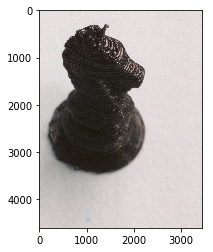

In [5]:
image = cv2.imread('H:\\AR-ExtendingOnlineGames\\actual_images\\knight\\IMG_20181216_113628.jpg') 
plt.imshow(image)

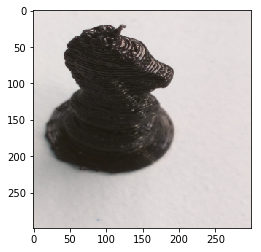

In [6]:
height, width = image.shape[:2]
resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
plt.imshow(resized_image)

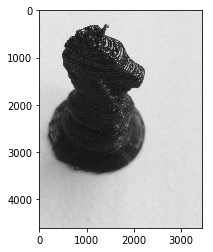

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

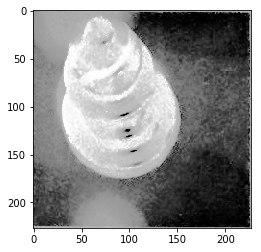

In [5]:
# https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html
equalized_gray = cv2.equalizeHist(gray)
plt.imshow(equalized_gray, cmap='gray_r')

In [2]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)

	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)

	# return the edged image
	return edged

def process_color_image(img_location, gamma = 0.33):
    image = cv2.imread(img_location) 
    #plt.imshow(image)
    
    # resize the image if the dimensions are too large
    height, width = image.shape[:2]
    
    if (height > 300) or (width > 300):
        resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    # convert the enlarged image to gray scale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray, cmap='gray')
    
    #equalized_gray = cv2.equalizeHist(gray)
    #plt.imshow(equalized_gray, cmap='gray')
    #return equalized_gray
    edges = auto_canny(gray, gamma)
    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image)
    axarr[0,1].imshow(gray, cmap='gray')
    axarr[1,0].imshow(edges, cmap='gray')
    #axarr[1,1].imshow(image_datas[3])
    
    #plt.imshow(edges, cmap='gray')
    
    return edges

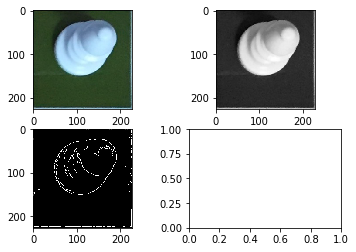

In [41]:
wb = process_color_image("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_train\\wb\\0645_30.jpg")

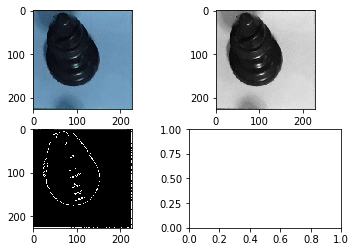

In [42]:
bb = process_color_image("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_train\\bb\\0647_2.jpg")

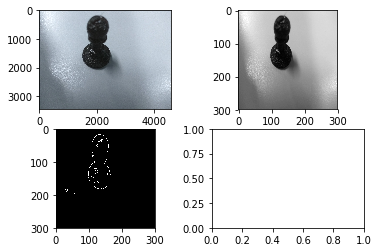

In [3]:
bp_edges = process_color_image("H:\\AR-ExtendingOnlineGames\\actual_images\\pawn\\IMG_20181215_160239.jpg")

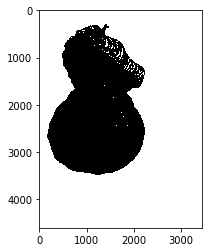

In [9]:
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [19]:
def perform_edge_detection_and_thresholding(img_location, gamma = 0.33):
    image = cv2.imread(img_location) 
    #plt.imshow(image)
    
    # resize the image if the dimensions are too large
    height, width = image.shape[:2]
    
    if (height > 300) or (width > 300):
        resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    # convert the enlarged image to gray scale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray, cmap='gray')
    
    edges = auto_canny(gray, gamma)
    
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image)
    axarr[0,1].imshow(gray, cmap='gray')
    axarr[1,0].imshow(edges, cmap='gray')
    axarr[1,1].imshow(thresh, cmap='gray')
    
    #plt.imshow(edges, cmap='gray')
    
    return thresh

## Black piece on white

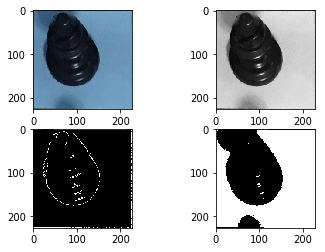

In [28]:
threshbw = perform_edge_detection_and_thresholding("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_train\\bb\\0647_2.jpg")

## Black piece on black

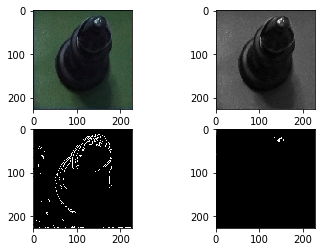

In [37]:
threshbb = perform_edge_detection_and_thresholding("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_test\\bb\\0760_5.jpg")

## White piece on black

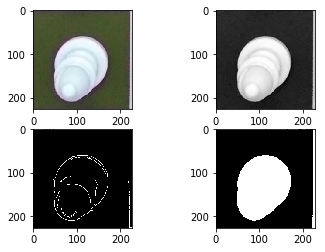

In [30]:
threshwb = perform_edge_detection_and_thresholding("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_test\\wb\\0761_58.jpg")

## White piece on white

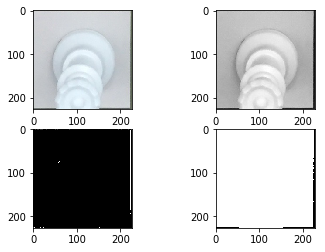

In [31]:
threshww = perform_edge_detection_and_thresholding("H:\\AR-ExtendingOnlineGames\\data\\chess_pieces_data\\Chess ID Public Data\\output_test\\wq\\0977_59.jpg")

In [32]:
threshbb.shape

(227, 227)

In [39]:
np.count_nonzero(threshww)/(threshww.shape[0] * threshww.shape[1])

0.9794678724601681

In [40]:
np.count_nonzero(threshwb)/(threshwb.shape[0] * threshwb.shape[1])

0.30578897319955756

In [41]:
np.count_nonzero(threshbw)/(threshbw.shape[0] * threshbw.shape[1])

0.6062799588581187

In [80]:
def get_piece_and_bg_color(image_location, draw = False):
    # print("Image location: " + image_location)
    image = cv2.imread(image_location) 
    #plt.imshow(image)
    
    # resize the image if the dimensions are too large
    height, width = image.shape[:2]
    
    if (height > 300) or (width > 300):
        resized_image = cv2.resize(image, (299, 299), interpolation = cv2.INTER_AREA)
    else:
        resized_image = image
    
    # convert the enlarged image to gray scale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray, cmap='gray')
    
    
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    
    if draw:
        f, axarr = plt.subplots(2,2)
        axarr[0,0].imshow(image)
        axarr[0,1].imshow(gray, cmap='gray')
        # axarr[1,0].imshow(edges, cmap='gray')
        axarr[1,1].imshow(thresh, cmap='gray')
    
    image_size = thresh.shape[0] * thresh.shape[1]
    non_zero_ratio = np.count_nonzero(thresh)/image_size
    
    if draw:
        print(non_zero_ratio)
    
    piece_color_position_color = {}
    
    if non_zero_ratio < 0.1:
        piece_color_position_color["piece"] = "b"
        piece_color_position_color["position"] = "b"
    elif non_zero_ratio > 0.9:
        piece_color_position_color["piece"] = "w"
        piece_color_position_color["position"] = "w"
    elif non_zero_ratio > 0.45:
        piece_color_position_color["piece"] = "b"
        piece_color_position_color["position"] = "w"
    else:
        piece_color_position_color["piece"] = "w"
        piece_color_position_color["position"] = "b"
        
    return piece_color_position_color
        

In [81]:
data_path = "H:\\AR-ExtendingOnlineGames\\data\\color_detection"

piece_color_actual = []
piece_color_expected = []

bg_color_actual = []
bg_color_expected = []

source_images = []

for fol in os.listdir(data_path):
    if ((fol[0] == "b") or (fol[0] == "w")):
        
        
        #print(fol)
        fol_path = os.path.join(data_path, fol)
        #print(fol_path)
        for file in os.listdir(fol_path):
            if (("_b" in file) or ("_w" in file)):
                
                if fol[0] == "b":
                    piece_color_expected.append("b")
                else:
                    piece_color_expected.append("w")
                    
                if "_b" in file:
                    bg_color_expected.append("b")
                elif "_w" in file:
                    bg_color_expected.append("w")
                
                complete_file_loc = os.path.join(fol_path, file)
                source_images.append(complete_file_loc)
                # print(complete_file_loc)
                piece_color_pos_color = get_piece_and_bg_color(complete_file_loc)
                
                piece_color_actual.append(piece_color_pos_color["piece"])
                bg_color_actual.append(piece_color_pos_color["position"])

In [82]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[88  8]
 [15 84]]


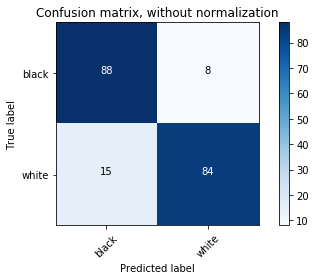

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(piece_color_expected, piece_color_actual)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["black", "white"],
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[ 82   6]
 [  3 104]]


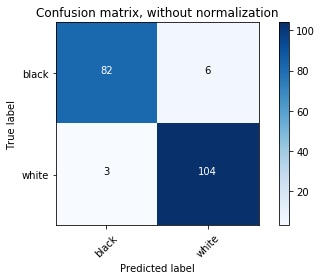

In [84]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(bg_color_expected, bg_color_actual)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["black", "white"],
                      title='Confusion matrix, without normalization')

## Verify the piece color failures - black pieces predicted white

H:\AR-ExtendingOnlineGames\data\color_detection\bb\0978_23_b.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0882_6_w.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0978_21_b.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0983_13_w.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0882_6_w.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0978_21_b.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0983_13_w.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0984_13_w.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0978_21_b.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0983_13_w.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bk\0984_13_w.jpg
H:\AR-ExtendingOnlineGames\data\color_detection\bn\0760_1_b.jpg


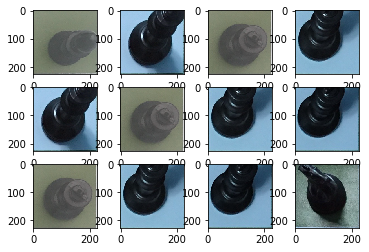

In [85]:
black_piece_predicted_white = []
for itr, c in enumerate(piece_color_expected):
    if ((c == "b") and (piece_color_actual[itr] == "w")):
        black_piece_predicted_white.append(itr)

num_cols = 4
num_rows = len(black_piece_predicted_white) // num_cols + 1
f, axarr = plt.subplots(num_rows, num_cols)

for itr in range(num_rows):
    for jtr in range(num_cols):
        image_pos = (black_piece_predicted_white[itr + jtr])
        image_location = source_images[image_pos]
        print(image_location)
        image = cv2.imread(image_location) 
        axarr[itr, jtr].imshow(image, cmap='gray')


0.1547284053639698
{'piece': 'w', 'position': 'b'}


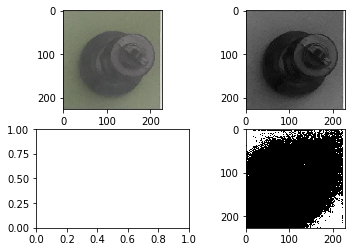

In [88]:
print(get_piece_and_bg_color("H:\\AR-ExtendingOnlineGames\\data\\color_detection\\bk\\0978_21_b.jpg", True))